***Distribution Pie Chart***

Number of Normal images: 3442
Number of Pneumonia images: 4273


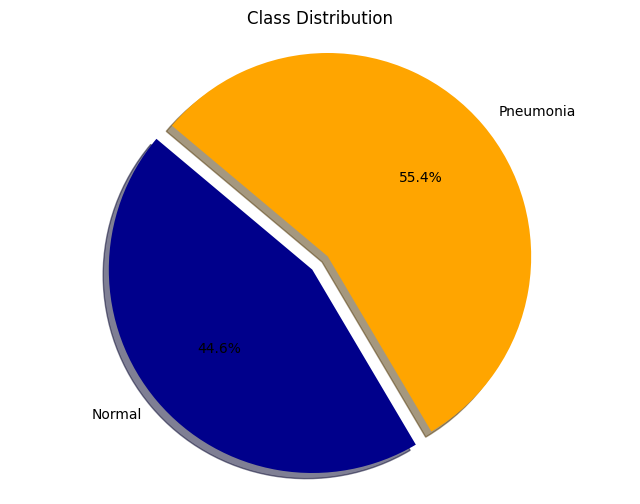

In [1]:
import os
import matplotlib.pyplot as plt

# Paths for the two classes
normal_path = "full_prior_data/normal"
pneumonia_path = "full_prior_data/pneumonia"

# Counting number of images in each folder
normal_count = len(os.listdir(normal_path))
pneumonia_count = len(os.listdir(pneumonia_path))

# Printing out counts
print(f"Number of Normal images: {normal_count}")
print(f"Number of Pneumonia images: {pneumonia_count}")

# Pie chart
labels = ['Normal', 'Pneumonia']
sizes = [normal_count, pneumonia_count]
colors = ['#00008B', '#FFA500']  # Dark blue and dark orange
explode = (0.1, 0)  # explode 1st slice for emphasis

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Save the pie chart as an image
plt.savefig('class_distribution.png')
plt.show()

***Image Dimensions Analysis***

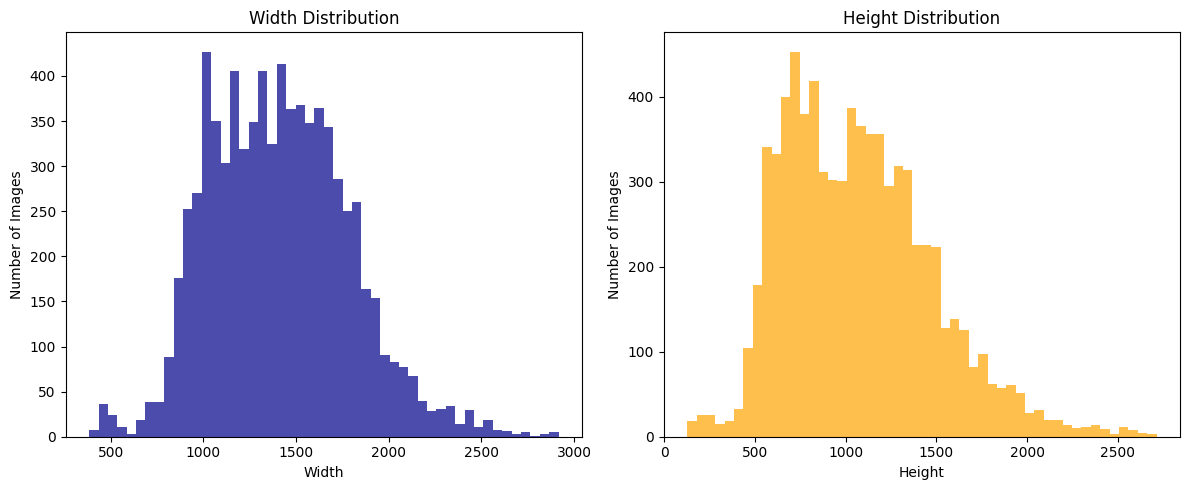

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Lists to store image dimensions
widths = []
heights = []

folders = ["full_prior_data/normal", "full_prior_data/pneumonia"]

# Loop through each folder and each image
for folder in folders:
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        with Image.open(img_path) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)

# Plotting histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=50, color='#00008B', alpha=0.7)  # Dark blue
plt.title('Width Distribution')
plt.xlabel('Width')
plt.ylabel('Number of Images')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=50, color='#FFA500', alpha=0.7)  # Dark orange
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Number of Images')

plt.tight_layout()

# Save the histograms as images
plt.savefig('width_height_distribution.png')
plt.show()

***Pixel Value Distribution***

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Lists to store aggregated statistics of images
normal_aggregated_stats = {
    "min": [],
    "max": [],
    "mean": [],
    "median": []
}

pneumonia_aggregated_stats = {
    "min": [],
    "max": [],
    "mean": [],
    "median": []
}

folders = {
    "Normal": "full_prior_data/normal",
    "Pneumonia": "full_prior_data/pneumonia"
}

# Loop through each folder and each image
for class_name, folder in folders.items():
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        with Image.open(img_path) as img:
            img_gray = img.convert('L')  # Convert to grayscale
            pixel_values = list(img_gray.getdata())
            
            # Calculate statistics per image
            min_value = np.min(pixel_values)
            max_value = np.max(pixel_values)
            mean_value = np.mean(pixel_values)
            median_value = np.median(pixel_values)
            
            if class_name == "Normal":
                normal_aggregated_stats["min"].append(min_value)
                normal_aggregated_stats["max"].append(max_value)
                normal_aggregated_stats["mean"].append(mean_value)
                normal_aggregated_stats["median"].append(median_value)
            else:
                pneumonia_aggregated_stats["min"].append(min_value)
                pneumonia_aggregated_stats["max"].append(max_value)
                pneumonia_aggregated_stats["mean"].append(mean_value)
                pneumonia_aggregated_stats["median"].append(median_value)




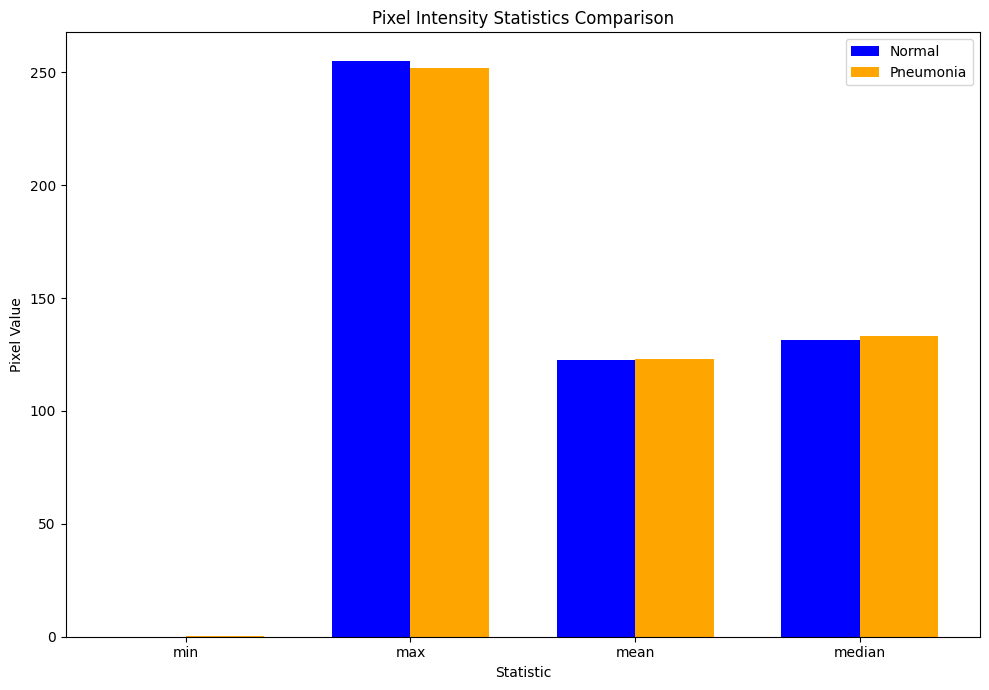

In [6]:
# Plot bar chart
labels = ['min', 'max', 'mean', 'median']
normal_stats = [np.mean(normal_aggregated_stats[key]) for key in labels]
pneumonia_stats = [np.mean(pneumonia_aggregated_stats[key]) for key in labels]

bar_width = 0.35
index = np.arange(len(labels))

plt.figure(figsize=(10, 7))
bar1 = plt.bar(index, normal_stats, bar_width, color='blue', label='Normal')
bar2 = plt.bar(index + bar_width, pneumonia_stats, bar_width, color='orange', label='Pneumonia')

plt.xlabel('Statistic')
plt.ylabel('Pixel Value')
plt.title('Pixel Intensity Statistics Comparison')
plt.xticks(index + bar_width / 2, labels)  # Place the labels in the center of the grouped bars
plt.legend()
plt.tight_layout()
plt.savefig('Pixel_stats.png')

plt.show()

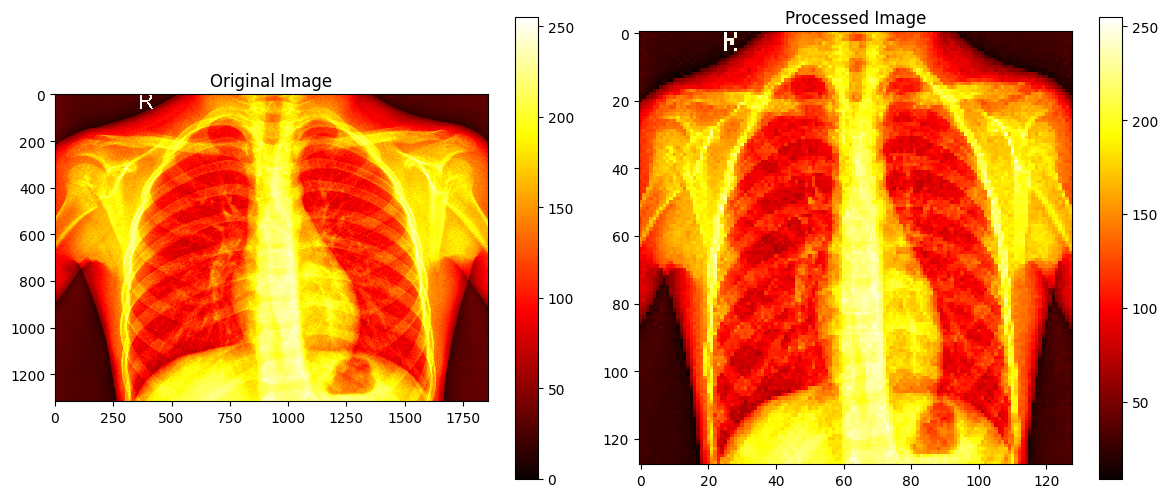

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Paths
original_path = "/home/konam20513/ML project/full_prior_data/normal/IM-0001-0001.jpeg"
processed_path = "/home/konam20513/ML project/data_to_model/train/normal/IM-0001-0001.jpeg"

# Load images
original_img = Image.open(original_path).convert('L')  # Convert to grayscale for heatmap
processed_img = Image.open(processed_path).convert('L')  # Convert to grayscale for heatmap

# Convert to numpy arrays
original_array = np.array(original_img)
processed_array = np.array(processed_img)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Original Image Heatmap
cax1 = ax[0].imshow(original_array, cmap='hot', interpolation='nearest')
ax[0].set_title("Original Image")
fig.colorbar(cax1, ax=ax[0])

# Processed Image Heatmap
cax2 = ax[1].imshow(processed_array, cmap='hot', interpolation='nearest')
ax[1].set_title("Processed Image")
fig.colorbar(cax2, ax=ax[1])

plt.tight_layout()
plt.show()
